In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
transactions = pd.read_csv("data/transaction_data.csv")
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [3]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   TRANS_TIME         int64  
 9   WEEK_NO            int64  
 10  COUPON_DISC        float64
 11  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(8)
memory usage: 237.6 MB


In [4]:
products = pd.read_csv("data/product.csv")
products.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [5]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PRODUCT_ID            92353 non-null  int64 
 1   MANUFACTURER          92353 non-null  int64 
 2   DEPARTMENT            92353 non-null  object
 3   BRAND                 92353 non-null  object
 4   COMMODITY_DESC        92353 non-null  object
 5   SUB_COMMODITY_DESC    92353 non-null  object
 6   CURR_SIZE_OF_PRODUCT  92353 non-null  object
dtypes: int64(2), object(5)
memory usage: 4.9+ MB


In [6]:
#Append category information to transactions
transactions = pd.merge(transactions, products, how = "left", on = "PRODUCT_ID")
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2595732 entries, 0 to 2595731
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   household_key         int64  
 1   BASKET_ID             int64  
 2   DAY                   int64  
 3   PRODUCT_ID            int64  
 4   QUANTITY              int64  
 5   SALES_VALUE           float64
 6   STORE_ID              int64  
 7   RETAIL_DISC           float64
 8   TRANS_TIME            int64  
 9   WEEK_NO               int64  
 10  COUPON_DISC           float64
 11  COUPON_MATCH_DISC     float64
 12  MANUFACTURER          int64  
 13  DEPARTMENT            object 
 14  BRAND                 object 
 15  COMMODITY_DESC        object 
 16  SUB_COMMODITY_DESC    object 
 17  CURR_SIZE_OF_PRODUCT  object 
dtypes: float64(4), int64(9), object(5)
memory usage: 376.3+ MB


In [7]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0,69,PRODUCE,Private,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS,1 LB


In [8]:
transactions["COMMODITY_DESC"].value_counts()

SOFT DRINKS                     117532
FLUID MILK PRODUCTS              85630
BAKED BREAD/BUNS/ROLLS           83232
CHEESE                           74885
BAG SNACKS                       67190
                                 ...  
NDAIRY/TEAS/JUICE/SOD                2
MISCELLANEOUS(CORP USE ONLY)         1
EASTER LILY                          1
MISCELLANEOUS CROUTONS               1
FROZEN PACKAGE MEAT                  1
Name: COMMODITY_DESC, Length: 308, dtype: int64

In [9]:
#add column with first purchase per product per household
transactions["first_purchase"] = np.NaN
transactions["first_purchase"].loc[transactions.groupby(["household_key", "PRODUCT_ID"]).DAY.idxmin()] = 1
transactions["first_purchase"].value_counts()

C:\Users\Gabriele\AppData\Local\Temp\ipykernel_13528\2806816894.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions["first_purchase"].loc[transactions.groupby(["household_key", "PRODUCT_ID"]).DAY.idxmin()] = 1


1.0    1401469
Name: first_purchase, dtype: int64

In [10]:
transactions["first_purchase"] = transactions["first_purchase"].fillna(0)

In [11]:
transactions["first_purchase"].value_counts()

1.0    1401469
0.0    1194263
Name: first_purchase, dtype: int64

In [12]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2595732 entries, 0 to 2595731
Data columns (total 19 columns):
 #   Column                Dtype  
---  ------                -----  
 0   household_key         int64  
 1   BASKET_ID             int64  
 2   DAY                   int64  
 3   PRODUCT_ID            int64  
 4   QUANTITY              int64  
 5   SALES_VALUE           float64
 6   STORE_ID              int64  
 7   RETAIL_DISC           float64
 8   TRANS_TIME            int64  
 9   WEEK_NO               int64  
 10  COUPON_DISC           float64
 11  COUPON_MATCH_DISC     float64
 12  MANUFACTURER          int64  
 13  DEPARTMENT            object 
 14  BRAND                 object 
 15  COMMODITY_DESC        object 
 16  SUB_COMMODITY_DESC    object 
 17  CURR_SIZE_OF_PRODUCT  object 
 18  first_purchase        float64
dtypes: float64(5), int64(9), object(5)
memory usage: 460.6+ MB


In [13]:
pd.set_option("display.max_rows", None)
transactions[["first_purchase", "COMMODITY_DESC"]].groupby("COMMODITY_DESC").mean().to_clipboard(excel=True)

In [14]:
fluid_milk = transactions[transactions["COMMODITY_DESC"] == "FLUID MILK PRODUCTS"]
fluid_milk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85630 entries, 40 to 2595656
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   household_key         85630 non-null  int64  
 1   BASKET_ID             85630 non-null  int64  
 2   DAY                   85630 non-null  int64  
 3   PRODUCT_ID            85630 non-null  int64  
 4   QUANTITY              85630 non-null  int64  
 5   SALES_VALUE           85630 non-null  float64
 6   STORE_ID              85630 non-null  int64  
 7   RETAIL_DISC           85630 non-null  float64
 8   TRANS_TIME            85630 non-null  int64  
 9   WEEK_NO               85630 non-null  int64  
 10  COUPON_DISC           85630 non-null  float64
 11  COUPON_MATCH_DISC     85630 non-null  float64
 12  MANUFACTURER          85630 non-null  int64  
 13  DEPARTMENT            85630 non-null  object 
 14  BRAND                 85630 non-null  object 
 15  COMMODITY_DESC  

In [15]:
#calculate regular shelf price w/o discounts
fluid_milk["shelf_price"] = (fluid_milk["SALES_VALUE"] - fluid_milk["RETAIL_DISC"] - fluid_milk["COUPON_MATCH_DISC"]) / fluid_milk["QUANTITY"]
#calculate paid shelf price with discounts
fluid_milk["paid_price"] = (fluid_milk["SALES_VALUE"] + fluid_milk["COUPON_DISC"]) / fluid_milk["QUANTITY"]
#calculate overall discount
fluid_milk["pct_disc"] = (fluid_milk["shelf_price"]-fluid_milk["paid_price"]) / fluid_milk["shelf_price"]
#calculate discount in percentage points versus regualar shelf price due to retailer loyalty card 
fluid_milk["pct_retail_disc"] = (-fluid_milk["RETAIL_DISC"] / fluid_milk["QUANTITY"]) / fluid_milk["shelf_price"]
#calculate discount in percentage points versus regualar shelf price due to manufacturer coupons 
fluid_milk["pct_coupon_disc"] = ((-fluid_milk["COUPON_DISC"]-fluid_milk["COUPON_MATCH_DISC"]) / fluid_milk["QUANTITY"] ) / fluid_milk["shelf_price"]

C:\Users\Gabriele\AppData\Local\Temp\ipykernel_13528\798129298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fluid_milk["shelf_price"] = (fluid_milk["SALES_VALUE"] - fluid_milk["RETAIL_DISC"] - fluid_milk["COUPON_MATCH_DISC"]) / fluid_milk["QUANTITY"]
C:\Users\Gabriele\AppData\Local\Temp\ipykernel_13528\798129298.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fluid_milk["paid_price"] = (fluid_milk["SALES_VALUE"] + fluid_milk["COUPON_DISC"]) / fluid_milk["QUANTITY"]
C:\Users\Gabriele\AppData\Local

In [16]:
pd.set_option('display.max_columns', None)
#soft_drinks[(soft_drinks["COUPON_MATCH_DISC"] < 0) & (soft_drinks["RETAIL_DISC"] == 0)].head()
#soft_drinks[soft_drinks["COUPON_MATCH_DISC"] < 0].head()
#soft_drinks[soft_drinks["RETAIL_DISC"] < 0].head()

<AxesSubplot:>

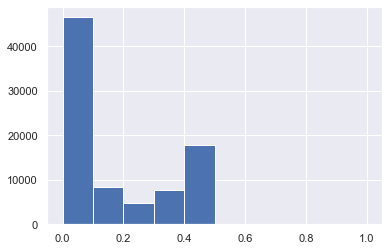

In [17]:
fluid_milk["pct_retail_disc"].hist()

<AxesSubplot:>

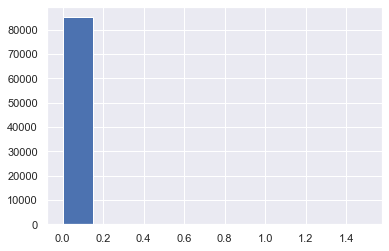

In [18]:
fluid_milk["pct_coupon_disc"].hist()

<AxesSubplot:>

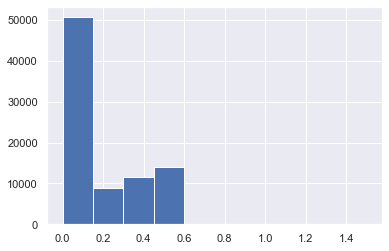

In [19]:
fluid_milk["pct_disc"].hist()

In [20]:
fluid_milk = fluid_milk[fluid_milk["shelf_price"] > 0]
fluid_milk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85502 entries, 40 to 2595656
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   household_key         85502 non-null  int64  
 1   BASKET_ID             85502 non-null  int64  
 2   DAY                   85502 non-null  int64  
 3   PRODUCT_ID            85502 non-null  int64  
 4   QUANTITY              85502 non-null  int64  
 5   SALES_VALUE           85502 non-null  float64
 6   STORE_ID              85502 non-null  int64  
 7   RETAIL_DISC           85502 non-null  float64
 8   TRANS_TIME            85502 non-null  int64  
 9   WEEK_NO               85502 non-null  int64  
 10  COUPON_DISC           85502 non-null  float64
 11  COUPON_MATCH_DISC     85502 non-null  float64
 12  MANUFACTURER          85502 non-null  int64  
 13  DEPARTMENT            85502 non-null  object 
 14  BRAND                 85502 non-null  object 
 15  COMMODITY_DESC  

In [21]:
fluid_milk = fluid_milk[fluid_milk["QUANTITY"] > 0]
fluid_milk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85502 entries, 40 to 2595656
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   household_key         85502 non-null  int64  
 1   BASKET_ID             85502 non-null  int64  
 2   DAY                   85502 non-null  int64  
 3   PRODUCT_ID            85502 non-null  int64  
 4   QUANTITY              85502 non-null  int64  
 5   SALES_VALUE           85502 non-null  float64
 6   STORE_ID              85502 non-null  int64  
 7   RETAIL_DISC           85502 non-null  float64
 8   TRANS_TIME            85502 non-null  int64  
 9   WEEK_NO               85502 non-null  int64  
 10  COUPON_DISC           85502 non-null  float64
 11  COUPON_MATCH_DISC     85502 non-null  float64
 12  MANUFACTURER          85502 non-null  int64  
 13  DEPARTMENT            85502 non-null  object 
 14  BRAND                 85502 non-null  object 
 15  COMMODITY_DESC  

In [22]:
fluid_milk = fluid_milk[fluid_milk["paid_price"] > 0]
fluid_milk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85430 entries, 40 to 2595656
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   household_key         85430 non-null  int64  
 1   BASKET_ID             85430 non-null  int64  
 2   DAY                   85430 non-null  int64  
 3   PRODUCT_ID            85430 non-null  int64  
 4   QUANTITY              85430 non-null  int64  
 5   SALES_VALUE           85430 non-null  float64
 6   STORE_ID              85430 non-null  int64  
 7   RETAIL_DISC           85430 non-null  float64
 8   TRANS_TIME            85430 non-null  int64  
 9   WEEK_NO               85430 non-null  int64  
 10  COUPON_DISC           85430 non-null  float64
 11  COUPON_MATCH_DISC     85430 non-null  float64
 12  MANUFACTURER          85430 non-null  int64  
 13  DEPARTMENT            85430 non-null  object 
 14  BRAND                 85430 non-null  object 
 15  COMMODITY_DESC  

In [23]:
fluid_milk.describe()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,first_purchase,shelf_price,paid_price,pct_disc,pct_retail_disc,pct_coupon_disc
count,85430.000000,8.543000e+04,85430.000000,8.543000e+04,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000
mean,1268.632483,3.408319e+10,390.891080,1.283151e+06,1.359241,2.402083,3313.610746,-0.548961,1562.206145,56.526337,-0.002598,-0.001476,175.708545,0.184759,2.218566,1.889811,0.162188,0.161018,0.001171
std,726.184171,4.720787e+09,189.334477,1.453524e+06,0.918942,1.370015,9182.191844,0.951234,408.373610,27.048307,0.063690,0.041689,403.761936,0.388105,0.533247,0.716230,0.194703,0.193670,0.022448
min,1.000000,2.698503e+10,1.000000,2.827200e+04,1.000000,0.030000,19.000000,-24.920000,0.000000,1.000000,-6.600000,-5.400000,69.000000,0.000000,0.250000,0.030000,0.000000,-0.000000,-0.000000
25%,647.000000,3.053065e+10,233.000000,9.952420e+05,1.000000,1.670000,329.000000,-0.820000,1302.000000,34.000000,0.000000,0.000000,69.000000,0.000000,1.850000,1.190000,0.000000,0.000000,0.000000
50%,1277.000000,3.281197e+10,392.000000,1.029743e+06,1.000000,2.270000,372.000000,0.000000,1617.000000,57.000000,0.000000,0.000000,69.000000,0.000000,1.990000,1.890000,0.000000,-0.000000,-0.000000
75%,1917.000000,4.012866e+10,556.000000,1.106523e+06,1.000000,2.690000,424.000000,0.000000,1850.000000,80.000000,0.000000,0.000000,69.000000,0.000000,2.590000,2.490000,0.365079,0.365079,-0.000000
max,2500.000000,4.229125e+10,711.000000,1.800523e+07,28.000000,31.800000,34280.000000,0.000000,2359.000000,102.000000,0.000000,0.000000,6308.000000,1.000000,4.990000,4.990000,0.987952,0.987952,0.771605


<AxesSubplot:>

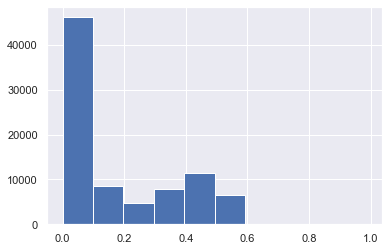

In [24]:
fluid_milk["pct_disc"].hist()

<AxesSubplot:>

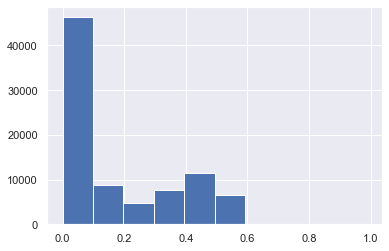

In [25]:
fluid_milk["pct_retail_disc"].hist()

<AxesSubplot:>

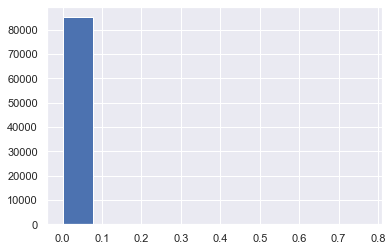

In [26]:
fluid_milk["pct_coupon_disc"].hist()

In [27]:
#adding in causal data
causal = pd.read_parquet("data/causal_data.parquet")
causal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36786524 entries, 0 to 36786523
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   PRODUCT_ID  int64 
 1   STORE_ID    int64 
 2   WEEK_NO     int64 
 3   display     object
 4   mailer      object
dtypes: int64(3), object(2)
memory usage: 1.4+ GB


In [28]:
causal_fluid_milk = pd.merge(causal, products[["PRODUCT_ID", "COMMODITY_DESC"]], how = "left", on = "PRODUCT_ID")

In [29]:
causal_fluid_milk.drop(causal_fluid_milk[causal_fluid_milk.COMMODITY_DESC != "FLUID MILK PRODUCTS"].index, inplace = True)
causal_fluid_milk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357763 entries, 85687 to 36713358
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PRODUCT_ID      357763 non-null  int64 
 1   STORE_ID        357763 non-null  int64 
 2   WEEK_NO         357763 non-null  int64 
 3   display         357763 non-null  object
 4   mailer          357763 non-null  object
 5   COMMODITY_DESC  357763 non-null  object
dtypes: int64(3), object(3)
memory usage: 19.1+ MB


In [30]:
causal_fluid_milk["COMMODITY_DESC"].value_counts()

FLUID MILK PRODUCTS    357763
Name: COMMODITY_DESC, dtype: int64

In [31]:
fluid_milk = pd.merge(fluid_milk, causal_fluid_milk, how = "left", on = ["PRODUCT_ID", "STORE_ID", "WEEK_NO"])
fluid_milk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85471 entries, 0 to 85470
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   household_key         85471 non-null  int64  
 1   BASKET_ID             85471 non-null  int64  
 2   DAY                   85471 non-null  int64  
 3   PRODUCT_ID            85471 non-null  int64  
 4   QUANTITY              85471 non-null  int64  
 5   SALES_VALUE           85471 non-null  float64
 6   STORE_ID              85471 non-null  int64  
 7   RETAIL_DISC           85471 non-null  float64
 8   TRANS_TIME            85471 non-null  int64  
 9   WEEK_NO               85471 non-null  int64  
 10  COUPON_DISC           85471 non-null  float64
 11  COUPON_MATCH_DISC     85471 non-null  float64
 12  MANUFACTURER          85471 non-null  int64  
 13  DEPARTMENT            85471 non-null  object 
 14  BRAND                 85471 non-null  object 
 15  COMMODITY_DESC_x   

In [32]:
#remove duplicates
fluid_milk.drop_duplicates(subset= ["household_key", "BASKET_ID", "STORE_ID", "DAY", "PRODUCT_ID"], keep = "last", inplace= True)
fluid_milk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85430 entries, 0 to 85470
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   household_key         85430 non-null  int64  
 1   BASKET_ID             85430 non-null  int64  
 2   DAY                   85430 non-null  int64  
 3   PRODUCT_ID            85430 non-null  int64  
 4   QUANTITY              85430 non-null  int64  
 5   SALES_VALUE           85430 non-null  float64
 6   STORE_ID              85430 non-null  int64  
 7   RETAIL_DISC           85430 non-null  float64
 8   TRANS_TIME            85430 non-null  int64  
 9   WEEK_NO               85430 non-null  int64  
 10  COUPON_DISC           85430 non-null  float64
 11  COUPON_MATCH_DISC     85430 non-null  float64
 12  MANUFACTURER          85430 non-null  int64  
 13  DEPARTMENT            85430 non-null  object 
 14  BRAND                 85430 non-null  object 
 15  COMMODITY_DESC_x   

In [33]:
#dummy variables for display
dummies_display = pd.get_dummies(fluid_milk["display"], prefix = "display")
fluid_milk = pd.concat((fluid_milk, dummies_display), axis = 1)
#dummy variables for mailer
dummies_mailer = pd.get_dummies(fluid_milk["mailer"], prefix = "mailer")
fluid_milk = pd.concat((fluid_milk, dummies_mailer), axis = 1)

In [34]:
fluid_milk.drop("COMMODITY_DESC_y", axis = 1, inplace = True)
fluid_milk.rename(columns = {"COMMODITY_DESC_x" : "COMMODITY_DESC"}, inplace=True)
fluid_milk.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,first_purchase,shelf_price,paid_price,pct_disc,pct_retail_disc,pct_coupon_disc,display,mailer,display_0,display_1,display_2,display_3,display_4,display_5,display_6,display_7,display_9,display_A,mailer_0,mailer_A,mailer_C,mailer_D,mailer_H,mailer_J,mailer_L,mailer_X
0,1172,26985025264,1,1106523,1,1.50,396,0.00,946,1,0.0,0.0,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA,1.0,1.50,1.50,0.000000,-0.000000,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1060,26985040735,1,1081189,1,1.16,315,-0.13,1251,1,0.0,0.0,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 QT,1.0,1.29,1.16,0.100775,0.100775,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2305,26996870743,2,1028891,1,3.19,414,0.00,1300,1,0.0,0.0,1225,GROCERY,National,FLUID MILK PRODUCTS,REFRIGERATED COFFEE CREAMERS,32 OZ,1.0,3.19,3.19,0.000000,-0.000000,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2305,26996870743,2,1029743,1,2.49,414,0.00,1300,1,0.0,0.0,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA,1.0,2.49,2.49,0.000000,-0.000000,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,271,26997082949,2,1126899,1,2.49,329,0.00,1719,1,0.0,0.0,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA,1.0,2.49,2.49,0.000000,-0.000000,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
fluid_milk.describe()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,first_purchase,shelf_price,paid_price,pct_disc,pct_retail_disc,pct_coupon_disc,display_0,display_1,display_2,display_3,display_4,display_5,display_6,display_7,display_9,display_A,mailer_0,mailer_A,mailer_C,mailer_D,mailer_H,mailer_J,mailer_L,mailer_X
count,85430.000000,8.543000e+04,85430.000000,8.543000e+04,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000
mean,1268.632483,3.408319e+10,390.891080,1.283151e+06,1.359241,2.402083,3313.610746,-0.548961,1562.206145,56.526337,-0.002598,-0.001476,175.708545,0.184759,2.218566,1.889811,0.162188,0.161018,0.001171,0.327239,0.001768,0.004366,0.060201,0.000304,0.000152,0.000632,0.002259,0.031792,0.001744,0.068442,0.009282,0.011366,0.324207,0.012267,0.000211,0.000152,0.004530
std,726.184171,4.720787e+09,189.334477,1.453524e+06,0.918942,1.370015,9182.191844,0.951234,408.373610,27.048307,0.063690,0.041689,403.761936,0.388105,0.533247,0.716230,0.194703,0.193670,0.022448,0.469208,0.042005,0.065933,0.237861,0.017443,0.012335,0.025134,0.047477,0.175447,0.041726,0.252504,0.095898,0.106005,0.468081,0.110077,0.014514,0.012335,0.067153
min,1.000000,2.698503e+10,1.000000,2.827200e+04,1.000000,0.030000,19.000000,-24.920000,0.000000,1.000000,-6.600000,-5.400000,69.000000,0.000000,0.250000,0.030000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,647.000000,3.053065e+10,233.000000,9.952420e+05,1.000000,1.670000,329.000000,-0.820000,1302.000000,34.000000,0.000000,0.000000,69.000000,0.000000,1.850000,1.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1277.000000,3.281197e+10,392.000000,1.029743e+06,1.000000,2.270000,372.000000,0.000000,1617.000000,57.000000,0.000000,0.000000,69.000000,0.000000,1.990000,1.890000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1917.000000,4.012866e+10,556.000000,1.106523e+06,1.000000,2.690000,424.000000,0.000000,1850.000000,80.000000,0.000000,0.000000,69.000000,0.000000,2.590000,2.490000,0.365079,0.365079,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2500.000000,4.229125e+10,711.000000,1.800523e+07,28.000000,31.800000,34280.000000,0.000000,2359.000000,102.000000,0.000000,0.000000,6308.000000,1.000000,4.990000,4.990000,0.987952,0.987952,0.771605,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
fluid_milk["household_key"].nunique()

2421

In [37]:
hhdemogs = pd.read_csv("data/hh_demographic.csv")
hhdemogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE_DESC             801 non-null    object
 1   MARITAL_STATUS_CODE  801 non-null    object
 2   INCOME_DESC          801 non-null    object
 3   HOMEOWNER_DESC       801 non-null    object
 4   HH_COMP_DESC         801 non-null    object
 5   HOUSEHOLD_SIZE_DESC  801 non-null    object
 6   KID_CATEGORY_DESC    801 non-null    object
 7   household_key        801 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 50.2+ KB


In [38]:
#addding household demographics
fluid_milk = pd.merge(fluid_milk, hhdemogs, how = "left", on="household_key")
fluid_milk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85430 entries, 0 to 85429
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   household_key         85430 non-null  int64  
 1   BASKET_ID             85430 non-null  int64  
 2   DAY                   85430 non-null  int64  
 3   PRODUCT_ID            85430 non-null  int64  
 4   QUANTITY              85430 non-null  int64  
 5   SALES_VALUE           85430 non-null  float64
 6   STORE_ID              85430 non-null  int64  
 7   RETAIL_DISC           85430 non-null  float64
 8   TRANS_TIME            85430 non-null  int64  
 9   WEEK_NO               85430 non-null  int64  
 10  COUPON_DISC           85430 non-null  float64
 11  COUPON_MATCH_DISC     85430 non-null  float64
 12  MANUFACTURER          85430 non-null  int64  
 13  DEPARTMENT            85430 non-null  object 
 14  BRAND                 85430 non-null  object 
 15  COMMODITY_DESC     

In [39]:
fluid_milk.describe(include="all")

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,first_purchase,shelf_price,paid_price,pct_disc,pct_retail_disc,pct_coupon_disc,display,mailer,display_0,display_1,display_2,display_3,display_4,display_5,display_6,display_7,display_9,display_A,mailer_0,mailer_A,mailer_C,mailer_D,mailer_H,mailer_J,mailer_L,mailer_X,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
count,85430.000000,8.543000e+04,85430.000000,8.543000e+04,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430,85430,85430,85430,85430,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,36774,36774,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,85430.000000,46668,46668,46668,46668,46668,46668,46668
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,1,10,33,NaN,NaN,NaN,NaN,NaN,NaN,10,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,3,12,5,6,5,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA,NaN,NaN,NaN,NaN,NaN,NaN,0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85430,77184,85430,65603,35243,NaN,NaN,NaN,NaN,NaN,NaN,27956,27697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17782,21052,11391,30427,14065,17334,30297
mean,1268.632483,3.408319e+10,390.891080,1.283151e+06,1.359241,2.402083,3313.610746,-0.548961,1562.206145,56.526337,-0.002598,-0.001476,175.708545,NaN,NaN,NaN,NaN,NaN,0.184759,2.218566,1.889811,0.162188,0.161018,0.001171,NaN,NaN,0.327239,0.001768,0.004366,0.060201,0.000304,0.000152,0.000632,0.002259,0.031792,0.001744,0.068442,0.009282,0.011366,0.324207,0.012267,0.000211,0.000152,0.004530,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,726.184171,4.720787e+09,189.334477,1.453524e+06,0.918942,1.370015,9182.191844,0.951234,408.373610,27.048307,0.063690,0.041689,403.761936,NaN,NaN,NaN,NaN,NaN,0.388105,0.533247,0.716230,0.194703,0.193670,0.022448,NaN,NaN,0.469208,0.042005,0.065933,0.237861,0.017443,0.012335,0.025134,0.047477,0.175447,0.041726,0.252504,0.095898,0.106005,0.468081,0.110077,0.014514,0.012335,0.067153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,2.698503e+10,1.000000,2.827200e+04,1.000000,0.030000,19.000000,-24.920000,0.000000,1.000000,-6.600000,-5.400000,69.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.250000,0.030000,0.000000,-0.000000,-0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,647.000000,3.053065e+10,233.000000,9.952420e+05,1.000000,1.670000,329.000000,-0.820000,1302.000000,34.000000,0.000000,0.000000,69.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.850000,1.190000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1277.000000,3.281197e+10,392.000000,1.029743e+06,1.000000,2.270000,372.000000,0.000000,1617.000000,57.000000,0.000000,0.000000,69.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.990000,1.890000,0.000000,-0.000000,-0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1917.000000,4.012866e+10,556.000000,1.106523e+06,1.000000,2.690000,

In [40]:
#adding info about coupon redemption
coupon_redempt = pd.read_csv("data/coupon_redempt.csv")
coupon_redempt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   household_key  2318 non-null   int64
 1   DAY            2318 non-null   int64
 2   COUPON_UPC     2318 non-null   int64
 3   CAMPAIGN       2318 non-null   int64
dtypes: int64(4)
memory usage: 72.6 KB


In [41]:
coupon = pd.read_csv("data/coupon.csv")
coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124548 entries, 0 to 124547
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   COUPON_UPC  124548 non-null  int64
 1   PRODUCT_ID  124548 non-null  int64
 2   CAMPAIGN    124548 non-null  int64
dtypes: int64(3)
memory usage: 2.9 MB


In [42]:
couponr_prodid = pd.merge(coupon_redempt, coupon, how = "left", on = ["COUPON_UPC" , "CAMPAIGN"])
couponr_prodid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2198362 entries, 0 to 2198361
Data columns (total 5 columns):
 #   Column         Dtype
---  ------         -----
 0   household_key  int64
 1   DAY            int64
 2   COUPON_UPC     int64
 3   CAMPAIGN       int64
 4   PRODUCT_ID     int64
dtypes: int64(5)
memory usage: 100.6 MB


In [43]:
fluid_milk = pd.merge(fluid_milk, couponr_prodid, how = "left", on = ["household_key", "PRODUCT_ID", "DAY"])
fluid_milk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85432 entries, 0 to 85431
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   household_key         85432 non-null  int64  
 1   BASKET_ID             85432 non-null  int64  
 2   DAY                   85432 non-null  int64  
 3   PRODUCT_ID            85432 non-null  int64  
 4   QUANTITY              85432 non-null  int64  
 5   SALES_VALUE           85432 non-null  float64
 6   STORE_ID              85432 non-null  int64  
 7   RETAIL_DISC           85432 non-null  float64
 8   TRANS_TIME            85432 non-null  int64  
 9   WEEK_NO               85432 non-null  int64  
 10  COUPON_DISC           85432 non-null  float64
 11  COUPON_MATCH_DISC     85432 non-null  float64
 12  MANUFACTURER          85432 non-null  int64  
 13  DEPARTMENT            85432 non-null  object 
 14  BRAND                 85432 non-null  object 
 15  COMMODITY_DESC     

In [44]:
#dummify household demogs
dummies_marital_status = pd.get_dummies(fluid_milk["MARITAL_STATUS_CODE"], prefix = "marital_status")
dummies_homeowner = pd.get_dummies(fluid_milk["HOMEOWNER_DESC"], prefix = "homeowner")
dummies_hhcomp = pd.get_dummies(fluid_milk["HH_COMP_DESC"], prefix = "hhcomp")
dummies_kidcat = pd.get_dummies(fluid_milk["KID_CATEGORY_DESC"], prefix = "kid_category")
fluid_milk = pd.concat((fluid_milk, dummies_marital_status), axis = 1)
fluid_milk = pd.concat((fluid_milk, dummies_homeowner), axis = 1)
fluid_milk = pd.concat((fluid_milk, dummies_hhcomp), axis = 1)
fluid_milk = pd.concat((fluid_milk, dummies_kidcat), axis = 1)
fluid_milk.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,first_purchase,shelf_price,paid_price,pct_disc,pct_retail_disc,pct_coupon_disc,display,mailer,display_0,display_1,display_2,display_3,display_4,display_5,display_6,display_7,display_9,display_A,mailer_0,mailer_A,mailer_C,mailer_D,mailer_H,mailer_J,mailer_L,mailer_X,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,COUPON_UPC,CAMPAIGN,marital_status_A,marital_status_B,marital_status_U,homeowner_Homeowner,homeowner_Probable Owner,homeowner_Probable Renter,homeowner_Renter,homeowner_Unknown,hhcomp_1 Adult Kids,hhcomp_2 Adults Kids,hhcomp_2 Adults No Kids,hhcomp_Single Female,hhcomp_Single Male,hhcomp_Unknown,kid_category_1,kid_category_2,kid_category_3+,kid_category_None/Unknown
0,1172,26985025264,1,1106523,1,1.50,396,0.00,946,1,0.0,0.0,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA,1.0,1.50,1.50,0.000000,-0.000000,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25-34,B,50-74K,Unknown,Single Male,1,None/Unknown,NaN,NaN,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,1060,26985040735,1,1081189,1,1.16,315,-0.13,1251,1,0.0,0.0,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 QT,1.0,1.29,1.16,0.100775,0.100775,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35-44,B,35-49K,Renter,2 Adults No Kids,2,None/Unknown,NaN,NaN,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
2,2305,26996870743,2,1028891,1,3.19,414,0.00,1300,1,0.0,0.0,1225,GROCERY,National,FLUID MILK PRODUCTS,REFRIGERATED COFFEE CREAMERS,32 OZ,1.0,3.19,3.19,0.000000,-0.000000,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,NaN,NaN,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,2305,26996870743,2,1029743,1,2.49,414,0.00,1300,1,0.0,0.0,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA,1.0,2.49,2.49,0.000000,-0.000000,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,NaN,NaN,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,271,26997082949,2,1126899,1,2.49,329,0.00,1719,1,0.0,0.0,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA,1.0,2.49,2.49,0.000000,-0.000000,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
fluid_milk["AGE_DESC"].value_counts()

45-54    17782
35-44    12250
25-34     7973
65+       3521
55-64     2952
19-24     2191
Name: AGE_DESC, dtype: int64

In [46]:
map_age = {"19-24":1, "25-34":2, "35-44":3, "45-54":4, "55-64":5, "65+":6}
fluid_milk= fluid_milk.assign(age_ordinal = fluid_milk.AGE_DESC.map(map_age))

In [47]:
fluid_milk.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,first_purchase,shelf_price,paid_price,pct_disc,pct_retail_disc,pct_coupon_disc,display,mailer,display_0,display_1,display_2,display_3,display_4,display_5,display_6,display_7,display_9,display_A,mailer_0,mailer_A,mailer_C,mailer_D,mailer_H,mailer_J,mailer_L,mailer_X,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,COUPON_UPC,CAMPAIGN,marital_status_A,marital_status_B,marital_status_U,homeowner_Homeowner,homeowner_Probable Owner,homeowner_Probable Renter,homeowner_Renter,homeowner_Unknown,hhcomp_1 Adult Kids,hhcomp_2 Adults Kids,hhcomp_2 Adults No Kids,hhcomp_Single Female,hhcomp_Single Male,hhcomp_Unknown,kid_category_1,kid_category_2,kid_category_3+,kid_category_None/Unknown,age_ordinal
0,1172,26985025264,1,1106523,1,1.50,396,0.00,946,1,0.0,0.0,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA,1.0,1.50,1.50,0.000000,-0.000000,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25-34,B,50-74K,Unknown,Single Male,1,None/Unknown,NaN,NaN,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,2.0
1,1060,26985040735,1,1081189,1,1.16,315,-0.13,1251,1,0.0,0.0,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 QT,1.0,1.29,1.16,0.100775,0.100775,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35-44,B,35-49K,Renter,2 Adults No Kids,2,None/Unknown,NaN,NaN,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,3.0
2,2305,26996870743,2,1028891,1,3.19,414,0.00,1300,1,0.0,0.0,1225,GROCERY,National,FLUID MILK PRODUCTS,REFRIGERATED COFFEE CREAMERS,32 OZ,1.0,3.19,3.19,0.000000,-0.000000,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,NaN,NaN,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,4.0
3,2305,26996870743,2,1029743,1,2.49,414,0.00,1300,1,0.0,0.0,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA,1.0,2.49,2.49,0.000000,-0.000000,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,NaN,NaN,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,4.0
4,271,26997082949,2,1126899,1,2.49,329,0.00,1719,1,0.0,0.0,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA,1.0,2.49,2.49,0.000000,-0.000000,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [48]:
fluid_milk["INCOME_DESC"].value_counts()

50-74K       11392
35-49K        9333
75-99K        5759
25-34K        3889
15-24K        3403
Under 15K     3248
125-149K      3162
100-124K      2305
150-174K      2203
250K+          982
175-199K       776
200-249K       217
Name: INCOME_DESC, dtype: int64

In [49]:
map_income = {"Under 15K":10, "15-24K":19.5, "25-34K":29.5, "35-49K":39.5, "50-74K":62, "75-99K":87, "100-124K":112, 
              "125-149K":137, "150-174K":162, "175-199K":187, "200-249K":224.5, "250K+":250}
fluid_milk = fluid_milk.assign(income_ordinal = fluid_milk.INCOME_DESC.map(map_income))
fluid_milk.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,first_purchase,shelf_price,paid_price,pct_disc,pct_retail_disc,pct_coupon_disc,display,mailer,display_0,display_1,display_2,display_3,display_4,display_5,display_6,display_7,display_9,display_A,mailer_0,mailer_A,mailer_C,mailer_D,mailer_H,mailer_J,mailer_L,mailer_X,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,COUPON_UPC,CAMPAIGN,marital_status_A,marital_status_B,marital_status_U,homeowner_Homeowner,homeowner_Probable Owner,homeowner_Probable Renter,homeowner_Renter,homeowner_Unknown,hhcomp_1 Adult Kids,hhcomp_2 Adults Kids,hhcomp_2 Adults No Kids,hhcomp_Single Female,hhcomp_Single Male,hhcomp_Unknown,kid_category_1,kid_category_2,kid_category_3+,kid_category_None/Unknown,age_ordinal,income_ordinal
0,1172,26985025264,1,1106523,1,1.50,396,0.00,946,1,0.0,0.0,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA,1.0,1.50,1.50,0.000000,-0.000000,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25-34,B,50-74K,Unknown,Single Male,1,None/Unknown,NaN,NaN,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,2.0,62.0
1,1060,26985040735,1,1081189,1,1.16,315,-0.13,1251,1,0.0,0.0,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 QT,1.0,1.29,1.16,0.100775,0.100775,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35-44,B,35-49K,Renter,2 Adults No Kids,2,None/Unknown,NaN,NaN,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,3.0,39.5
2,2305,26996870743,2,1028891,1,3.19,414,0.00,1300,1,0.0,0.0,1225,GROCERY,National,FLUID MILK PRODUCTS,REFRIGERATED COFFEE CREAMERS,32 OZ,1.0,3.19,3.19,0.000000,-0.000000,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,NaN,NaN,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,4.0,62.0
3,2305,26996870743,2,1029743,1,2.49,414,0.00,1300,1,0.0,0.0,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA,1.0,2.49,2.49,0.000000,-0.000000,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,NaN,NaN,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,4.0,62.0
4,271,26997082949,2,1126899,1,2.49,329,0.00,1719,1,0.0,0.0,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA,1.0,2.49,2.49,0.000000,-0.000000,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [50]:
fluid_milk["HOUSEHOLD_SIZE_DESC"].value_counts()

2     17334
1     14006
3      6594
5+     4610
4      4125
Name: HOUSEHOLD_SIZE_DESC, dtype: int64

In [51]:
map_hhsize = {"1":1, "2":2, "3":3, "4":4, "5+":5}
fluid_milk = fluid_milk.assign(hhsize_ordinal = fluid_milk.HOUSEHOLD_SIZE_DESC.map(map_hhsize))
fluid_milk.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,first_purchase,shelf_price,paid_price,pct_disc,pct_retail_disc,pct_coupon_disc,display,mailer,display_0,display_1,display_2,display_3,display_4,display_5,display_6,display_7,display_9,display_A,mailer_0,mailer_A,mailer_C,mailer_D,mailer_H,mailer_J,mailer_L,mailer_X,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,COUPON_UPC,CAMPAIGN,marital_status_A,marital_status_B,marital_status_U,homeowner_Homeowner,homeowner_Probable Owner,homeowner_Probable Renter,homeowner_Renter,homeowner_Unknown,hhcomp_1 Adult Kids,hhcomp_2 Adults Kids,hhcomp_2 Adults No Kids,hhcomp_Single Female,hhcomp_Single Male,hhcomp_Unknown,kid_category_1,kid_category_2,kid_category_3+,kid_category_None/Unknown,age_ordinal,income_ordinal,hhsize_ordinal
0,1172,26985025264,1,1106523,1,1.50,396,0.00,946,1,0.0,0.0,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA,1.0,1.50,1.50,0.000000,-0.000000,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25-34,B,50-74K,Unknown,Single Male,1,None/Unknown,NaN,NaN,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,2.0,62.0,1.0
1,1060,26985040735,1,1081189,1,1.16,315,-0.13,1251,1,0.0,0.0,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 QT,1.0,1.29,1.16,0.100775,0.100775,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35-44,B,35-49K,Renter,2 Adults No Kids,2,None/Unknown,NaN,NaN,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,3.0,39.5,2.0
2,2305,26996870743,2,1028891,1,3.19,414,0.00,1300,1,0.0,0.0,1225,GROCERY,National,FLUID MILK PRODUCTS,REFRIGERATED COFFEE CREAMERS,32 OZ,1.0,3.19,3.19,0.000000,-0.000000,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,NaN,NaN,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,4.0,62.0,1.0
3,2305,26996870743,2,1029743,1,2.49,414,0.00,1300,1,0.0,0.0,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA,1.0,2.49,2.49,0.000000,-0.000000,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,NaN,NaN,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,4.0,62.0,1.0
4,271,26997082949,2,1126899,1,2.49,329,0.00,1719,1,0.0,0.0,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA,1.0,2.49,2.49,0.000000,-0.000000,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [52]:
fluid_milk.describe()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,first_purchase,shelf_price,paid_price,pct_disc,pct_retail_disc,pct_coupon_disc,display_0,display_1,display_2,display_3,display_4,display_5,display_6,display_7,display_9,display_A,mailer_0,mailer_A,mailer_C,mailer_D,mailer_H,mailer_J,mailer_L,mailer_X,COUPON_UPC,CAMPAIGN,marital_status_A,marital_status_B,marital_status_U,homeowner_Homeowner,homeowner_Probable Owner,homeowner_Probable Renter,homeowner_Renter,homeowner_Unknown,hhcomp_1 Adult Kids,hhcomp_2 Adults Kids,hhcomp_2 Adults No Kids,hhcomp_Single Female,hhcomp_Single Male,hhcomp_Unknown,kid_category_1,kid_category_2,kid_category_3+,kid_category_None/Unknown,age_ordinal,income_ordinal,hhsize_ordinal
count,85432.000000,8.543200e+04,85432.000000,8.543200e+04,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,1.290000e+02,129.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.00000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,85432.000000,46669.000000,46669.000000,46669.000000
mean,1268.627528,3.408317e+10,390.891914,1.283141e+06,1.359245,2.402132,3313.541940,-0.548966,1562.207826,56.526454,-0.002621,-0.001476,175.733109,0.184755,2.218596,1.889820,0.162193,0.161017,0.001176,0.327231,0.001767,0.004366,0.060200,0.000304,0.000152,0.000632,0.002259,0.031791,0.001744,0.068440,0.009282,0.011366,0.324199,0.012267,0.000211,0.000152,0.004530,2.081402e+10,12.612403,0.246418,0.074000,0.225852,0.356155,0.008685,0.006344,0.033020,0.142066,0.03810,0.148914,0.164634,0.085963,0.055799,0.052861,0.080157,0.054628,0.056841,0.354645,3.469134,70.220553,2.314299
std,726.180169,4.720734e+09,189.332347,1.453508e+06,0.918935,1.370055,9182.095381,0.951224,408.376669,27.048002,0.063872,0.041689,403.789127,0.388101,0.533276,0.716224,0.194703,0.193667,0.022475,0.469205,0.042005,0.065932,0.237858,0.017443,0.012335,0.025133,0.047477,0.175445,0.041726,0.252502,0.095897,0.106003,0.468078,0.110076,0.014514,0.012335,0.067152,1.930216e+10,4.221060,0.430927,0.261773,0.418145,0.478864,0.092790,0.079398,0.178691,0.349120,0.19144,0.356006,0.370852,0.280311,0.229534,0.223757,0.271538,0.227254,0.231539,0.478408,1.204837,51.202469,1.259062
min,1.000000,2.698503e+10,1.000000,2.827200e+04,1.000000,0.030000,19.000000,-24.920000,0.000000,1.000000,-6.600000,-5.400000,69.000000,0.000000,0.250000,0.030000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000009e+10,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,1.000000
25%,647.000000,3.053066e+10,233.000000,9.952420e+05,1.000000,1.670000,329.000000,-0.820000,1302.000000,34.000000,0.000000,0.000000,69.000000,0.000000,1.850000,1.190000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000009e+10,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,39.500000,1.000000
50%,1277.000000,3.281197e+10,392.000000,1.029743e+06,1.000000,2.270000,372.000000,0.000000,1617.000000,57.000000,0.000000,0.000000,69.

In [53]:
fluid_milk.to_csv("data/fluid_milk.csv")

In [54]:
fluid_milk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85432 entries, 0 to 85431
Data columns (total 74 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   household_key              85432 non-null  int64  
 1   BASKET_ID                  85432 non-null  int64  
 2   DAY                        85432 non-null  int64  
 3   PRODUCT_ID                 85432 non-null  int64  
 4   QUANTITY                   85432 non-null  int64  
 5   SALES_VALUE                85432 non-null  float64
 6   STORE_ID                   85432 non-null  int64  
 7   RETAIL_DISC                85432 non-null  float64
 8   TRANS_TIME                 85432 non-null  int64  
 9   WEEK_NO                    85432 non-null  int64  
 10  COUPON_DISC                85432 non-null  float64
 11  COUPON_MATCH_DISC          85432 non-null  float64
 12  MANUFACTURER               85432 non-null  int64  
 13  DEPARTMENT                 85432 non-null  obj

In [55]:
campaign_desc = pd.read_csv("data/campaign_desc.csv")
coupon = pd.read_csv("data/coupon.csv")
campaign_table = pd.read_csv("data/campaign_table.csv")
products = pd.read_csv("data/product.csv")

In [56]:
campaign_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DESCRIPTION  30 non-null     object
 1   CAMPAIGN     30 non-null     int64 
 2   START_DAY    30 non-null     int64 
 3   END_DAY      30 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


In [57]:
coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124548 entries, 0 to 124547
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   COUPON_UPC  124548 non-null  int64
 1   PRODUCT_ID  124548 non-null  int64
 2   CAMPAIGN    124548 non-null  int64
dtypes: int64(3)
memory usage: 2.9 MB


In [58]:
campaign_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DESCRIPTION    7208 non-null   object
 1   household_key  7208 non-null   int64 
 2   CAMPAIGN       7208 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 169.1+ KB


In [59]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PRODUCT_ID            92353 non-null  int64 
 1   MANUFACTURER          92353 non-null  int64 
 2   DEPARTMENT            92353 non-null  object
 3   BRAND                 92353 non-null  object
 4   COMMODITY_DESC        92353 non-null  object
 5   SUB_COMMODITY_DESC    92353 non-null  object
 6   CURR_SIZE_OF_PRODUCT  92353 non-null  object
dtypes: int64(2), object(5)
memory usage: 4.9+ MB


In [60]:
products = products[products["COMMODITY_DESC"] == "FLUID MILK PRODUCTS"]
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 73 to 92071
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PRODUCT_ID            455 non-null    int64 
 1   MANUFACTURER          455 non-null    int64 
 2   DEPARTMENT            455 non-null    object
 3   BRAND                 455 non-null    object
 4   COMMODITY_DESC        455 non-null    object
 5   SUB_COMMODITY_DESC    455 non-null    object
 6   CURR_SIZE_OF_PRODUCT  455 non-null    object
dtypes: int64(2), object(5)
memory usage: 28.4+ KB


In [61]:
products["COMMODITY_DESC"].value_counts()

FLUID MILK PRODUCTS    455
Name: COMMODITY_DESC, dtype: int64

In [62]:
campaign_data = pd.merge(products, coupon, how = "left", on = "PRODUCT_ID")
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1681 entries, 0 to 1680
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PRODUCT_ID            1681 non-null   int64  
 1   MANUFACTURER          1681 non-null   int64  
 2   DEPARTMENT            1681 non-null   object 
 3   BRAND                 1681 non-null   object 
 4   COMMODITY_DESC        1681 non-null   object 
 5   SUB_COMMODITY_DESC    1681 non-null   object 
 6   CURR_SIZE_OF_PRODUCT  1681 non-null   object 
 7   COUPON_UPC            1680 non-null   float64
 8   CAMPAIGN              1680 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 131.3+ KB


In [63]:
pd.set_option("display.max_columns" , None)
campaign_data.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,COUPON_UPC,CAMPAIGN
0,28272,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 QT,1.000009e+10,8.0
1,28272,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 QT,1.000009e+10,13.0
2,28272,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 QT,1.000009e+10,18.0
3,32553,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,,1.000009e+10,8.0
4,32553,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,,1.000009e+10,13.0


In [64]:
campaign_data["COUPON_UPC"].nunique()

17

In [65]:
campaign_data["COUPON_UPC"].describe()

count    1.680000e+03
mean     1.854022e+10
std      1.764933e+10
min      1.000009e+10
25%      1.000009e+10
50%      1.000009e+10
75%      1.000009e+10
max      5.704710e+10
Name: COUPON_UPC, dtype: float64

In [66]:
campaign_data = pd.merge(campaign_data, campaign_desc, how = "left", on = "CAMPAIGN")
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1681 entries, 0 to 1680
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PRODUCT_ID            1681 non-null   int64  
 1   MANUFACTURER          1681 non-null   int64  
 2   DEPARTMENT            1681 non-null   object 
 3   BRAND                 1681 non-null   object 
 4   COMMODITY_DESC        1681 non-null   object 
 5   SUB_COMMODITY_DESC    1681 non-null   object 
 6   CURR_SIZE_OF_PRODUCT  1681 non-null   object 
 7   COUPON_UPC            1680 non-null   float64
 8   CAMPAIGN              1680 non-null   float64
 9   DESCRIPTION           1680 non-null   object 
 10  START_DAY             1680 non-null   float64
 11  END_DAY               1680 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 170.7+ KB


In [67]:
campaign_data.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,COUPON_UPC,CAMPAIGN,DESCRIPTION,START_DAY,END_DAY
0,28272,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 QT,1.000009e+10,8.0,TypeA,412.0,460.0
1,28272,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 QT,1.000009e+10,13.0,TypeA,504.0,551.0
2,28272,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 QT,1.000009e+10,18.0,TypeA,587.0,642.0
3,32553,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,,1.000009e+10,8.0,TypeA,412.0,460.0
4,32553,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,,1.000009e+10,13.0,TypeA,504.0,551.0


In [68]:
campaign_data = pd.merge(campaign_data, campaign_table, how = "left", on = "CAMPAIGN")
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1797238 entries, 0 to 1797237
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   PRODUCT_ID            int64  
 1   MANUFACTURER          int64  
 2   DEPARTMENT            object 
 3   BRAND                 object 
 4   COMMODITY_DESC        object 
 5   SUB_COMMODITY_DESC    object 
 6   CURR_SIZE_OF_PRODUCT  object 
 7   COUPON_UPC            float64
 8   CAMPAIGN              float64
 9   DESCRIPTION_x         object 
 10  START_DAY             float64
 11  END_DAY               float64
 12  DESCRIPTION_y         object 
 13  household_key         float64
dtypes: float64(5), int64(2), object(7)
memory usage: 205.7+ MB


In [69]:
campaign_data.drop("DESCRIPTION_y", axis = 1, inplace = True)

In [70]:
campaign_data.rename(columns = {"DESCRIPTION_x" : "DESCRIPTION"}, inplace = True)

In [71]:
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1797238 entries, 0 to 1797237
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   PRODUCT_ID            int64  
 1   MANUFACTURER          int64  
 2   DEPARTMENT            object 
 3   BRAND                 object 
 4   COMMODITY_DESC        object 
 5   SUB_COMMODITY_DESC    object 
 6   CURR_SIZE_OF_PRODUCT  object 
 7   COUPON_UPC            float64
 8   CAMPAIGN              float64
 9   DESCRIPTION           object 
 10  START_DAY             float64
 11  END_DAY               float64
 12  household_key         float64
dtypes: float64(5), int64(2), object(6)
memory usage: 192.0+ MB


In [72]:
campaign_data["COUPON_UPC"].describe()

count    1.797237e+06
mean     1.765445e+10
std      1.691918e+10
min      1.000009e+10
25%      1.000009e+10
50%      1.000009e+10
75%      1.000009e+10
max      5.704710e+10
Name: COUPON_UPC, dtype: float64

In [73]:
campaign_data = campaign_data[campaign_data["COUPON_UPC"] > 0]
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1797237 entries, 0 to 1797237
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   PRODUCT_ID            int64  
 1   MANUFACTURER          int64  
 2   DEPARTMENT            object 
 3   BRAND                 object 
 4   COMMODITY_DESC        object 
 5   SUB_COMMODITY_DESC    object 
 6   CURR_SIZE_OF_PRODUCT  object 
 7   COUPON_UPC            float64
 8   CAMPAIGN              float64
 9   DESCRIPTION           object 
 10  START_DAY             float64
 11  END_DAY               float64
 12  household_key         float64
dtypes: float64(5), int64(2), object(6)
memory usage: 192.0+ MB


In [74]:
fluid_milk = fluid_milk[fluid_milk.age_ordinal > 0]
fluid_milk.describe()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,first_purchase,shelf_price,paid_price,pct_disc,pct_retail_disc,pct_coupon_disc,display_0,display_1,display_2,display_3,display_4,display_5,display_6,display_7,display_9,display_A,mailer_0,mailer_A,mailer_C,mailer_D,mailer_H,mailer_J,mailer_L,mailer_X,COUPON_UPC,CAMPAIGN,marital_status_A,marital_status_B,marital_status_U,homeowner_Homeowner,homeowner_Probable Owner,homeowner_Probable Renter,homeowner_Renter,homeowner_Unknown,hhcomp_1 Adult Kids,hhcomp_2 Adults Kids,hhcomp_2 Adults No Kids,hhcomp_Single Female,hhcomp_Single Male,hhcomp_Unknown,kid_category_1,kid_category_2,kid_category_3+,kid_category_None/Unknown,age_ordinal,income_ordinal,hhsize_ordinal
count,46669.000000,4.666900e+04,46669.000000,4.666900e+04,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,9.600000e+01,96.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000,46669.000000
mean,1266.707343,3.421637e+10,397.443292,1.314499e+06,1.368167,2.405095,3567.821873,-0.558129,1550.434335,57.462470,-0.002846,-0.001673,181.507446,0.147100,2.213820,1.882719,0.163355,0.161910,0.001445,0.324155,0.001693,0.003386,0.065997,0.000450,0.000129,0.000750,0.002336,0.033363,0.001543,0.072918,0.009578,0.011228,0.322870,0.012342,0.000279,0.000193,0.004393,2.218757e+10,12.739583,0.451092,0.135465,0.413444,0.651975,0.015899,0.011614,0.060447,0.260066,0.069747,0.272601,0.301378,0.157364,0.102145,0.096767,0.146736,0.100002,0.104052,0.649210,3.469134,70.220553,2.314299
std,743.518342,4.688511e+09,186.416933,1.565304e+06,0.923700,1.367401,9534.575768,0.960646,393.951770,26.630972,0.053632,0.031583,402.439885,0.354209,0.535067,0.715143,0.195011,0.193794,0.024714,0.468063,0.041109,0.058087,0.248279,0.021208,0.011338,0.027375,0.048272,0.179584,0.039248,0.260004,0.097399,0.105367,0.467578,0.110409,0.016688,0.013886,0.066132,2.010250e+10,4.253159,0.497608,0.342223,0.492456,0.476349,0.125087,0.107140,0.238316,0.438675,0.254722,0.445302,0.458861,0.364147,0.302842,0.295643,0.353846,0.300006,0.305331,0.477222,1.204837,51.202469,1.259062
min,1.000000,2.698503e+10,1.000000,2.827200e+04,1.000000,0.030000,22.000000,-24.920000,0.000000,1.000000,-2.990000,-1.800000,69.000000,0.000000,0.390000,0.030000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000009e+10,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,1.000000
25%,624.000000,3.062830e+10,242.000000,9.952420e+05,1.000000,1.670000,333.000000,-0.820000,1254.000000,35.000000,0.000000,0.000000,69.000000,0.000000,1.850000,1.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000009e+10,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,39.500000,1.000000
50%,1264.000000,3.295784e+10,404.000000,1.029743e+06,1.000000,2.270000,375.000000,0.000000,1606.000000,58.000000,0.000000,0.000000,6

In [75]:
#remove first 30 weeks
fluid_milk.drop(fluid_milk[fluid_milk.WEEK_NO < 30].index, inplace = True)
fluid_milk.describe()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,first_purchase,shelf_price,paid_price,pct_disc,pct_retail_disc,pct_coupon_disc,display_0,display_1,display_2,display_3,display_4,display_5,display_6,display_7,display_9,display_A,mailer_0,mailer_A,mailer_C,mailer_D,mailer_H,mailer_J,mailer_L,mailer_X,COUPON_UPC,CAMPAIGN,marital_status_A,marital_status_B,marital_status_U,homeowner_Homeowner,homeowner_Probable Owner,homeowner_Probable Renter,homeowner_Renter,homeowner_Unknown,hhcomp_1 Adult Kids,hhcomp_2 Adults Kids,hhcomp_2 Adults No Kids,hhcomp_Single Female,hhcomp_Single Male,hhcomp_Unknown,kid_category_1,kid_category_2,kid_category_3+,kid_category_None/Unknown,age_ordinal,income_ordinal,hhsize_ordinal
count,37784.000000,3.778400e+04,37784.000000,3.778400e+04,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,9.600000e+01,96.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000
mean,1272.462762,3.552281e+10,460.462180,1.339487e+06,1.386010,2.421766,3674.790414,-0.574610,1546.693521,66.467526,-0.003055,-0.001921,183.779616,0.108379,2.214898,1.878961,0.167014,0.165401,0.001613,0.328499,0.001403,0.003599,0.066007,0.000556,0.000132,0.000741,0.002488,0.033003,0.001323,0.076117,0.006299,0.013868,0.326434,0.009025,0.000344,0.000238,0.005426,2.218757e+10,12.739583,0.454452,0.135745,0.409803,0.654378,0.015642,0.011433,0.060608,0.257940,0.070347,0.272602,0.302906,0.156098,0.101419,0.096628,0.146491,0.101472,0.103615,0.648423,3.475386,70.450865,2.318151
std,742.884936,4.251390e+09,146.751082,1.661276e+06,0.956551,1.392664,9688.602894,0.984029,389.344162,20.959290,0.053571,0.034162,411.319456,0.310863,0.541270,0.726842,0.195593,0.194208,0.026227,0.469673,0.037427,0.059888,0.248297,0.023569,0.011503,0.027213,0.049817,0.178648,0.036354,0.265189,0.079117,0.116946,0.468915,0.094572,0.018546,0.015432,0.073459,2.010250e+10,4.253159,0.497928,0.342522,0.491804,0.475577,0.124086,0.106316,0.238612,0.437507,0.255735,0.445304,0.459521,0.362953,0.301886,0.295455,0.353602,0.301956,0.304765,0.477469,1.198760,51.235707,1.257163
min,1.000000,2.984714e+10,202.000000,2.827200e+04,1.000000,0.250000,22.000000,-24.920000,0.000000,30.000000,-2.990000,-1.800000,69.000000,0.000000,0.390000,0.250000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000009e+10,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,1.000000
25%,631.000000,3.194492e+10,334.000000,9.952420e+05,1.000000,1.590000,333.000000,-0.850000,1253.000000,48.000000,0.000000,0.000000,69.000000,0.000000,1.850000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000009e+10,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,39.500000,1.000000
50%,1285.000000,3.390633e+10,464.000000,1.029743e+06,1.000000,2.290000,380.000000,-0.100000,1602.000000,67.000000,0.000000,0.00

In [76]:
fluid_milk_wcamp = pd.merge(fluid_milk, campaign_data, how = "left", on = ["household_key", "PRODUCT_ID"])
fluid_milk_wcamp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103693 entries, 0 to 103692
Data columns (total 85 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   household_key              103693 non-null  int64  
 1   BASKET_ID                  103693 non-null  int64  
 2   DAY                        103693 non-null  int64  
 3   PRODUCT_ID                 103693 non-null  int64  
 4   QUANTITY                   103693 non-null  int64  
 5   SALES_VALUE                103693 non-null  float64
 6   STORE_ID                   103693 non-null  int64  
 7   RETAIL_DISC                103693 non-null  float64
 8   TRANS_TIME                 103693 non-null  int64  
 9   WEEK_NO                    103693 non-null  int64  
 10  COUPON_DISC                103693 non-null  float64
 11  COUPON_MATCH_DISC          103693 non-null  float64
 12  MANUFACTURER_x             103693 non-null  int64  
 13  DEPARTMENT_x               10

In [77]:
fluid_milk_wcamp["CAMPAIGN_y"] = np.where((fluid_milk_wcamp["START_DAY"] <= fluid_milk_wcamp["DAY"]) & 
                                           (fluid_milk_wcamp["DAY"] <= fluid_milk_wcamp["END_DAY"]), 
                                           fluid_milk_wcamp["CAMPAIGN_y"], np.NaN)
fluid_milk_wcamp["DESCRIPTION"] = np.where((fluid_milk_wcamp["START_DAY"] <= fluid_milk_wcamp["DAY"]) & 
                                           (fluid_milk_wcamp["DAY"] <= fluid_milk_wcamp["END_DAY"]), 
                                           fluid_milk_wcamp["DESCRIPTION"], np.NaN)

In [78]:
fluid_milk_wcamp["DESCRIPTION"] = np.where((fluid_milk_wcamp["START_DAY"] <= fluid_milk_wcamp["DAY"]) & 
                                           (fluid_milk_wcamp["DAY"] <= fluid_milk_wcamp["END_DAY"]), 
                                           fluid_milk_wcamp["DESCRIPTION"], np.NaN)

In [79]:
fluid_milk_wcamp.drop(labels = ["MANUFACTURER_y", "DEPARTMENT_y", "BRAND_y", "COMMODITY_DESC_y", "SUB_COMMODITY_DESC_y", 
                                 "CURR_SIZE_OF_PRODUCT_y"], 
                       axis = 1, inplace = True)

In [80]:
fluid_milk_wcamp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103693 entries, 0 to 103692
Data columns (total 79 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   household_key              103693 non-null  int64  
 1   BASKET_ID                  103693 non-null  int64  
 2   DAY                        103693 non-null  int64  
 3   PRODUCT_ID                 103693 non-null  int64  
 4   QUANTITY                   103693 non-null  int64  
 5   SALES_VALUE                103693 non-null  float64
 6   STORE_ID                   103693 non-null  int64  
 7   RETAIL_DISC                103693 non-null  float64
 8   TRANS_TIME                 103693 non-null  int64  
 9   WEEK_NO                    103693 non-null  int64  
 10  COUPON_DISC                103693 non-null  float64
 11  COUPON_MATCH_DISC          103693 non-null  float64
 12  MANUFACTURER_x             103693 non-null  int64  
 13  DEPARTMENT_x               10

In [81]:
fluid_milk_wcamp.sort_values(by = ["household_key", "PRODUCT_ID", "BASKET_ID", "CAMPAIGN_y"], inplace = True)
fluid_milk_wcamp.drop_duplicates(subset = ["household_key", "PRODUCT_ID", "BASKET_ID"], keep = "first", inplace = True)
fluid_milk_wcamp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37783 entries, 63335 to 63468
Data columns (total 79 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   household_key              37783 non-null  int64  
 1   BASKET_ID                  37783 non-null  int64  
 2   DAY                        37783 non-null  int64  
 3   PRODUCT_ID                 37783 non-null  int64  
 4   QUANTITY                   37783 non-null  int64  
 5   SALES_VALUE                37783 non-null  float64
 6   STORE_ID                   37783 non-null  int64  
 7   RETAIL_DISC                37783 non-null  float64
 8   TRANS_TIME                 37783 non-null  int64  
 9   WEEK_NO                    37783 non-null  int64  
 10  COUPON_DISC                37783 non-null  float64
 11  COUPON_MATCH_DISC          37783 non-null  float64
 12  MANUFACTURER_x             37783 non-null  int64  
 13  DEPARTMENT_x               37783 non-null 

In [82]:
fluid_milk_wcamp.to_csv("data/fluid_milk_wcamp.csv")

In [4]:
#dummify campaign and description of campaign
fluid_milk_wcamp = pd.read_csv("data/fluid_milk_wcamp.csv")
dummies_campaign_y = pd.get_dummies(fluid_milk_wcamp["CAMPAIGN_y"], prefix = "campaign_y")
dummies_description = pd.get_dummies(fluid_milk_wcamp["DESCRIPTION"], prefix = "description")
fluid_milk_wcamp = pd.concat((fluid_milk_wcamp, dummies_campaign_y), axis = 1)
fluid_milk_wcamp = pd.concat((fluid_milk_wcamp, dummies_description), axis = 1)
fluid_milk_wcamp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37783 entries, 0 to 37782
Data columns (total 88 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 37783 non-null  int64  
 1   household_key              37783 non-null  int64  
 2   BASKET_ID                  37783 non-null  int64  
 3   DAY                        37783 non-null  int64  
 4   PRODUCT_ID                 37783 non-null  int64  
 5   QUANTITY                   37783 non-null  int64  
 6   SALES_VALUE                37783 non-null  float64
 7   STORE_ID                   37783 non-null  int64  
 8   RETAIL_DISC                37783 non-null  float64
 9   TRANS_TIME                 37783 non-null  int64  
 10  WEEK_NO                    37783 non-null  int64  
 11  COUPON_DISC                37783 non-null  float64
 12  COUPON_MATCH_DISC          37783 non-null  float64
 13  MANUFACTURER_x             37783 non-null  int

In [5]:
fluid_milk_wcamp.to_csv("data/fluid_milk_wcamp.csv")